Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
import random
from itertools import accumulate
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic
from tqdm.auto import tqdm

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [2]:
instance = 2

if instance == 1:
    UNIVERSE_SIZE = 100
    NUM_SETS = 10
    DENSITY = 0.2
elif instance == 2:
    UNIVERSE_SIZE = 1_000
    NUM_SETS = 100
    DENSITY = 0.2
elif instance == 3:
    UNIVERSE_SIZE = 10_000
    NUM_SETS = 1_000
    DENSITY = 0.2
elif instance == 4:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.1
elif instance == 5:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.2
elif instance == 6:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [3]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [4]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def tweak(solution):
    new_solution = solution.copy()
    #pos_set = np.random.randint(0, NUM_SETS)
    pos_set = rng.integers(0, NUM_SETS)
    new_solution[pos_set] = not new_solution[pos_set]
    return new_solution

def coverage(solution):
    """Returns the coverage of a solution"""
    return sum(np.logical_or.reduce(SETS[solution]))

def fitness(solution):
    return (valid(solution), -cost(solution))

def multiple_mutation(solution):
    mask = rng.random(NUM_SETS) < 0.01
    new_solution = np.logical_xor(solution, mask)
    return new_solution

# Basic Hill Climbing

Starting with a empty initial_solution, we are trying to find a strategy that leads us to better results. In this first part we are trying to find the solution starting from an empty (or partially empty) solution and step by step adding one elements to the solution, based on the fitness used, until reaching a valid solution

ic| steps: 32
    valid(current_solution): np.True_
    cost(current_solution): np.float64(9828.331681300928)


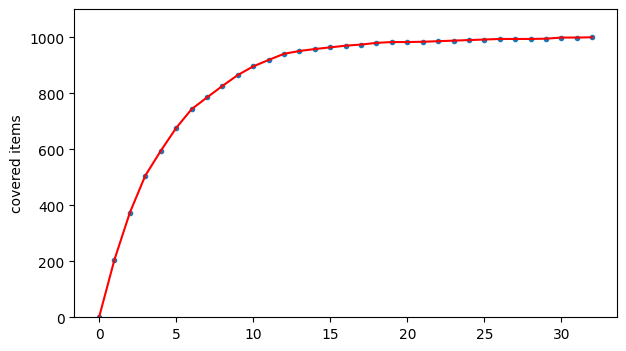

In [5]:
current_solution = np.full(NUM_SETS, False)
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    steps += 1
    new_solution = tweak(current_solution)
    history.append(coverage(new_solution))
    if cost(new_solution) > cost(current_solution):
        current_solution = new_solution
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

The number of step decrease starting with a random initial_solution with 10% of the sets 

ic| steps: 29
    valid(current_solution): np.True_
    cost(current_solution): np.float64(10313.221348604302)


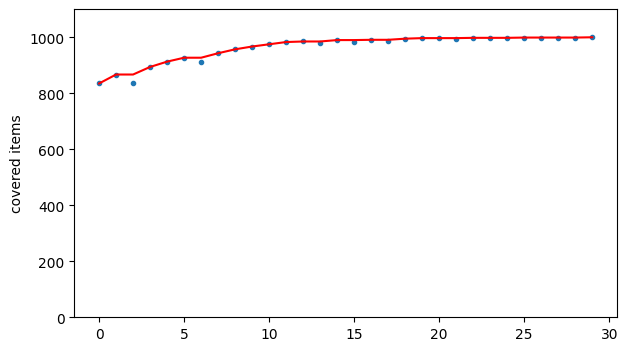

In [6]:
current_solution = rng.random(NUM_SETS) < 5/NUM_SETS
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    steps += 1
    new_solution = tweak(current_solution)
    history.append(coverage(new_solution))
    if cost(new_solution) > cost(current_solution):
        current_solution = new_solution
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

Trying to take the solution that brings us closest to the result

ic| steps: 32
    valid(current_solution): np.True_
    cost(current_solution): np.float64(9607.64570163325)


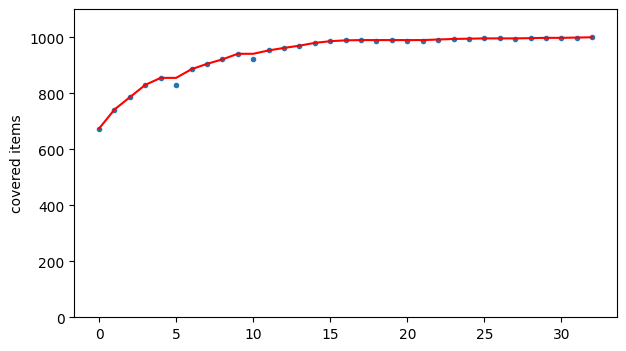

In [7]:
current_solution = rng.random(NUM_SETS) < 5/NUM_SETS
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    steps += 1
    new_solution = tweak(current_solution)
    history.append(coverage(new_solution))
    if (cost(new_solution) < cost(current_solution) and coverage(new_solution) == coverage(current_solution)):
        current_solution = new_solution
    elif coverage(new_solution) > coverage(current_solution):
        current_solution = new_solution
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

Starting with a random initial_solution with 5/NUM_SETS% of the sets 

ic| steps: 170
    valid(current_solution): np.True_
    cost(current_solution): np.float64(6857.592000020859)


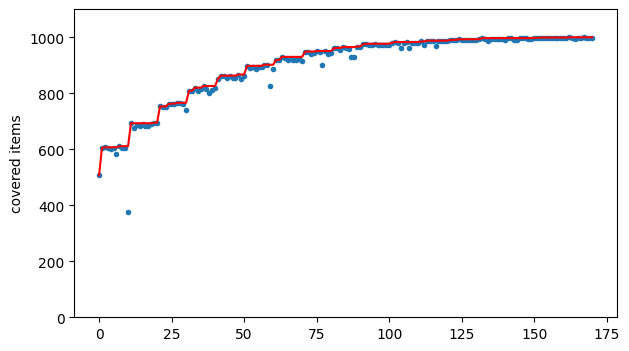

In [8]:
current_solution = rng.random(NUM_SETS) < 5/NUM_SETS
n = 10
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    temp = current_solution[:]
    for inner_step in range(n):
        steps += 1
        new_solution = tweak(current_solution)
        history.append(coverage(new_solution))
        if (cost(new_solution) < cost(temp) and coverage(new_solution) == coverage(temp)):
            temp = new_solution
        elif coverage(new_solution) > coverage(temp):
            temp = new_solution
    if (cost(temp) < cost(current_solution) and coverage(temp) == coverage(current_solution)):
        current_solution = temp
    elif coverage(temp) > coverage(current_solution):
        current_solution = temp
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

## Steepest Step and Restart

Starting with an empty set

ic| steps: 210
    valid(best_solution): np.True_
    cost(best_solution): np.float64(7721.172325492403)


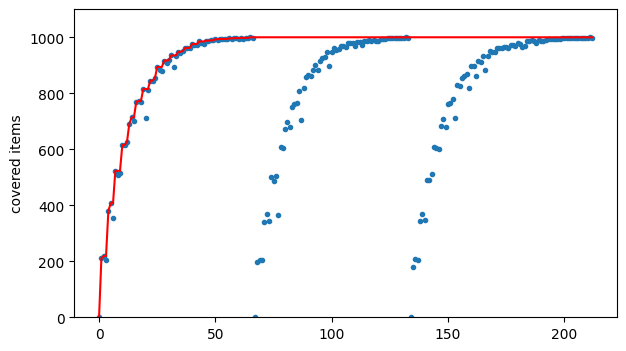

In [9]:
NUM_RESTARTS = 3
STEEPEST_STEP_CANDIDATES = 3
history = list()
steps = 0
max_value = -1
for i in range(0, NUM_RESTARTS):
    solution = np.full(NUM_SETS, False)
    history.append(coverage(solution))
    while valid(solution) == False:
        candidates = [tweak(solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
        candidates_fitness = list()
        for c in candidates:
            f = coverage(c)
            history.append(f)
            candidates_fitness.append(f)
        idx = candidates_fitness.index(max(candidates_fitness))
        new_solution = candidates[idx]
        new_fitness = candidates_fitness[idx]
        steps += STEEPEST_STEP_CANDIDATES
        if new_fitness > coverage(solution):
            solution = new_solution
    if coverage(solution) > max_value:
        max_value = coverage(solution)
        best_solution = solution
ic(steps, valid(best_solution), cost(best_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), [max(history[: i + 1]) for i in range(len(history))], color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

Start taking all the sets and randomly remove the set to minimize the cost (but we don't get a good solution)

In [10]:
current_solution = np.full(NUM_SETS, True)
for n in range(6000):
    new_solution = tweak(current_solution)
    if cost(new_solution) < cost(current_solution) and valid(new_solution) == True:
        current_solution = new_solution
ic(valid(current_solution), cost(current_solution))
None

ic| valid(current_solution): np.True_
    cost(current_solution): np.float64(7418.051452175323)


## Professor example

  0%|          | 0/1000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-7299.166653735417))


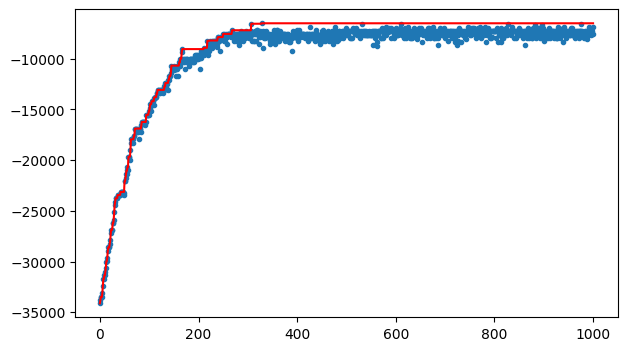

In [11]:
#Prof example made in class
current_solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
#mutation = tweak
mutation = multiple_mutation
for steps in tqdm(range(1000)):
    new_solution = mutation(current_solution)
    f = fitness(new_solution)
    history.append(float(f[1]))
    if f > solution_fitness:
        current_solution = new_solution
        solution_fitness = fitness(current_solution)
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

### Improved RHMC with strength

ic| fitness(current_solution): (np.True_, np.float64(-34114.741217738774))


  0%|          | 0/6000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-6901.88282897519))


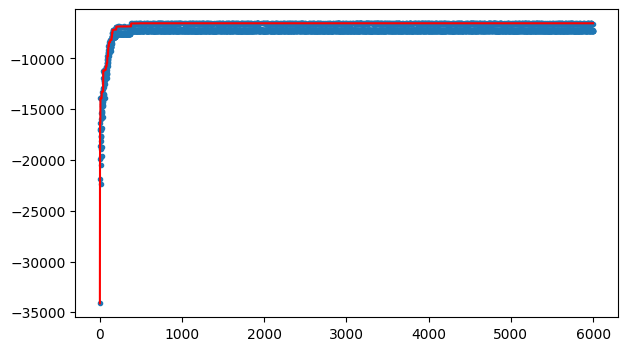

In [12]:
#Prof example made in class
def multiple_mutation_strength(solution: np.ndarray, strength: float = 0.3):
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True
    new_solution = np.logical_xor(solution, mask)
    return new_solution

BUFFER_SIZE = 5
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
strength = 0.5
buffer = list()
for steps in tqdm(range(6000)):
    #we want a parameter SELF-ADAPTIVE for the strength
    new_solution = multiple_mutation_strength(current_solution, strength)
    f = fitness(new_solution)
    history.append(float(f[1]))
    #voglio che se ho tanti miglioramenti aumento la strength mentre se ne ho 0 decremento la strength
    buffer.append(f > solution_fitness)
    buffer = buffer[-BUFFER_SIZE:]
    if sum(buffer) > 1:
        strength *= 1.1
    if sum(buffer) == 0:
        strength /= 1.1
    if f > solution_fitness:
        current_solution = new_solution
        solution_fitness = fitness(current_solution)
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

# Solution

We are trying to find a strategy that leads us to better results but this solutin is a lot time consuming and using the same number of steps the solution are equivalent with the professor solution

ic| fitness(current_solution): (np.True_, np.float64(-34114.741217738774))


  0%|          | 0/6000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-16860.64087010623))


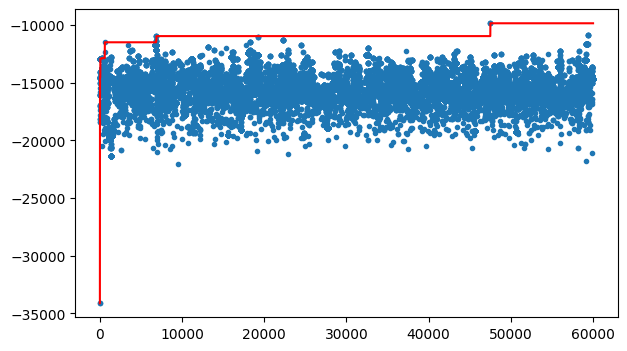

In [13]:
BUFFER_SIZE = 5
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
strength = 0.5
buffer = list()
for steps in tqdm(range(6000)):
    temp = current_solution[:]
    f = fitness(temp)

    for inner_step in range(10):
        new_solution = multiple_mutation_strength(current_solution, strength) #maggiore e la strength maggiori sono le modifiche che andro a fare
        history.append(float(f[1]))
        if fitness(new_solution) > f:
            temp = new_solution
            f = fitness(temp)

    buffer.append(f > solution_fitness)
    buffer = buffer[-BUFFER_SIZE:]
    #se ho effettuato delle modifiche negli ultimi 5 elementi incremento strength, se non ho effettuato modifiche decremento strength
    if sum(buffer) > 1:
        strength *= 1.1
    if sum(buffer) == 0:
        strength /= 1.1
    if f > solution_fitness:
        current_solution = new_solution
        solution_fitness = fitness(current_solution)
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

Trying steepest-step and multiple mutation strength

ic| fitness(current_solution): (np.True_, np.float64(-34114.741217738774))


  0%|          | 0/2000 [00:00<?, ?it/s]

ic| fitness(current_solution): (np.True_, np.float64(-6717.577722739113))


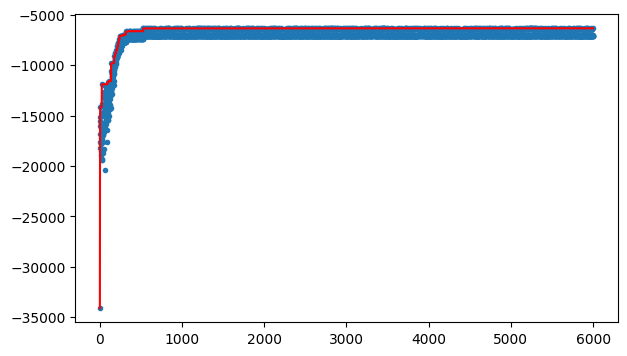

In [14]:
BUFFER_SIZE = 5
STEEPEST_STEP_CANDIDATES = 3
current_solution = rng.random(NUM_SETS) < 1
ic(fitness(current_solution))
solution_fitness = fitness(current_solution)
history = [float(solution_fitness[1])]
mutation = tweak
strength = 0.5
buffer = list()
for steps in tqdm(range(2000)):
    candidates = [multiple_mutation_strength(current_solution, strength) for i in range(0, STEEPEST_STEP_CANDIDATES)]
    candidates_fitness = list()
    for c in candidates:
        f = fitness(c)
        history.append(float(f[1]))
        candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness))
    new_solution = candidates[idx]
    new_fitness = candidates_fitness[idx]

    buffer.append(f > solution_fitness)
    buffer = buffer[-BUFFER_SIZE:]
    if sum(buffer) > 1:
        strength *= 1.1
    if sum(buffer) == 0:
        strength /= 1.1
    if new_fitness > solution_fitness:
        current_solution = new_solution
        solution_fitness = new_fitness
ic(fitness(current_solution))
plt.figure(figsize=(7, 4))
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

### sources
- prof example of HC (1-max, multiple-knapsack, set-cover)
- slides
- wikipedia (https://en.wikipedia.org/wiki/Set_cover_problem)